## Quantitative Risk Management: Lecture 0


Very often in Finance, one has to consider the risk of making a decision... write introduction bullshit later

note: this will not teach you the best computational tools to use and will not be an extremely practical course, but rather focus on introducing the topics as well as their "MVP" implementations(although I will make around 5 separate notebooks doing end-to-end analysis)

0. **Course Outline**
2. Types of data: Descripive and Inferential Statistics (done)
2. Statistical Distributions and Processes (done)
2. Monte Carlo Simulation (done)
2. Time Series Analysis (done)
2. Sources of Risk (done)
2. Risk Measures
2. Risk Forecasting and Backtesting
2. Extreme Value Theory


# Progress

Text(0.5, 1.0, 'Goal: 40mins/day, Current:35.67')

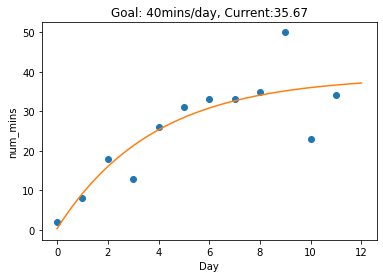

In [1]:
from matplotlib import pyplot as plt 
import numpy as np

mins = [2,8,18, 13,26,31, 33,33,35,50, 23, 34,]

plt.scatter(range(len(mins)),mins)



plt.plot(0)

from scipy.optimize import curve_fit
model = lambda x,a,b,c: -np.exp(-a*x + b) + c

bro = curve_fit(model, list(range(len(mins))),mins)[0]

plt.plot(np.linspace(0,len(mins),10000),[model(i,*bro) for i in np.linspace(0,len(mins),10000)])

plt.xlabel('Day')
plt.ylabel('num_mins')
plt.title('Goal: 40mins/day, Current:'+str(round(np.mean(mins[-3:]),2)))

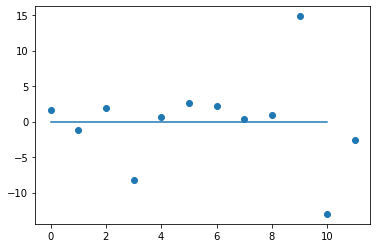

In [2]:
resid = [-model(i,*bro) + mins[i] for i in range(len(mins))]

plt.scatter(range(len(mins)),resid)
plt.plot([0]*11)

(array([1., 1., 0., 1., 3., 5., 0., 0., 0., 1.]),
 array([-13.00855858, -10.22477499,  -7.4409914 ,  -4.65720781,
         -1.87342422,   0.91035937,   3.69414296,   6.47792655,
          9.26171014,  12.04549373,  14.82927732]),
 <BarContainer object of 10 artists>)

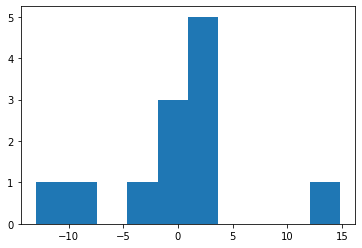

In [3]:
plt.hist(resid,)

In [4]:
print('lim_t-->inf : num_mins_per_day = ',model(700,*bro))

lim_t-->inf : num_mins_per_day =  38.80255319063076


In [5]:
supermins = [mins[0:i] for i in range(1,len(mins))] + [mins]
 

In [6]:
a = []

for i in range(6,len(supermins)):
    a.append(curve_fit(model, list(range(len(supermins[i]))),supermins[i])[0])

    

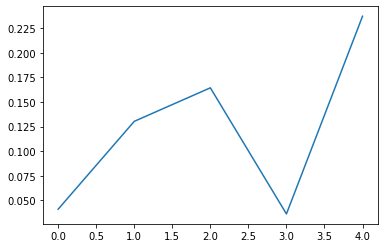

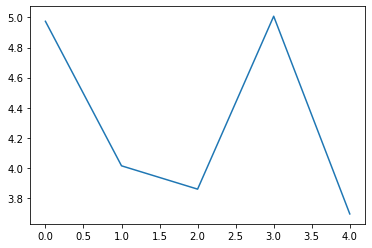

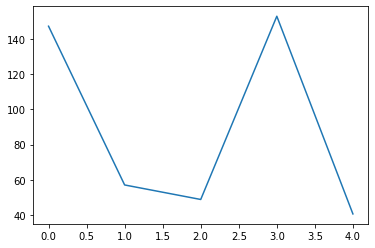

In [7]:
for j in range(3):
    plt.plot([a[i][j] for i in range(5)])
    plt.show()

In [8]:
import numpy as np
from matplotlib import pyplot as plt 
import scipy as sci
import pandas as pd
from pandas_datareader import data ## This import allows us to import stock price data from yahoo finance

def get_stock_price(ticker, start='2016-01-01', end='2020-12-31',price_type = 'Adj Close'):
    return data.DataReader(ticker,'yahoo',start,end)[price_type]


a = list(get_stock_price('GOOG'))

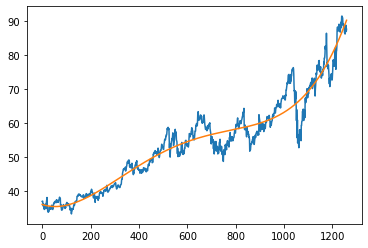

In [9]:
plt.plot(a)

reg = lambda x,a,b,c,d,e: a*x**4 + b*x**3 + c*x**2 + d*x**1 + e*x**0

mod = curve_fit(reg,list(range(len(a))),a)[0]

plt.plot(range(len(a)),[reg(i,*mod) for i in range(len(a))])

In [10]:
b = [a[:i] for i in range(len(a))][10:]

In [11]:
one,two,three,four,five = [],[],[],[],[]

for i in range(len(b)):
    c = curve_fit(reg,list(range(len(b[i]))),b[i])[0]
    one.append(c[0])
    two.append(c[1])
    three.append(c[2])
    four.append(c[3])
    five.append(c[4])

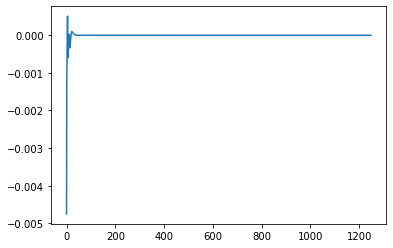

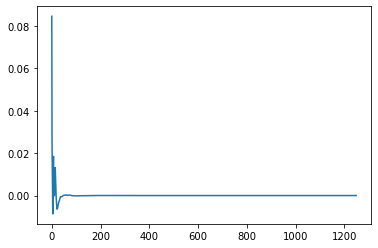

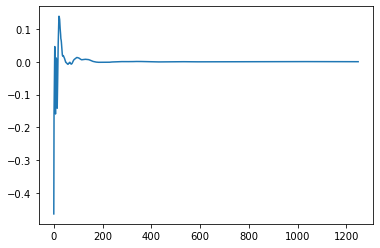

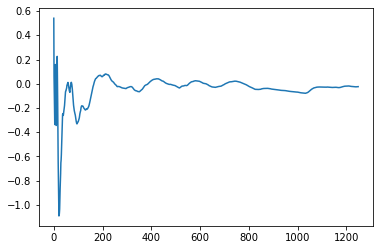

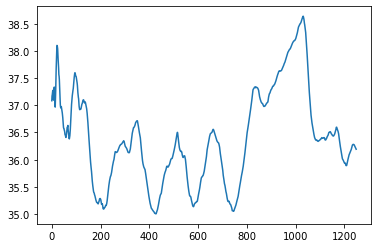

In [12]:
plt.plot(one)
plt.show()
plt.plot(two)
plt.show()
plt.plot(three)
plt.show()
plt.plot(four)
plt.show()
plt.plot(five)

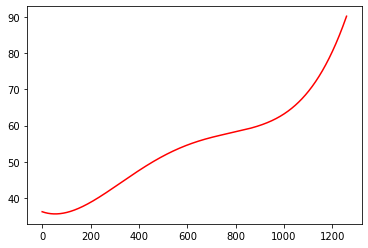

In [13]:
plt.plot(range(len(a)),[reg(i,*mod) for i in range(len(a))],color='r')

In [14]:
mod

array([ 1.64997287e-10, -3.63950828e-07,  2.49743117e-04, -2.37400632e-02,
        3.61817946e+01])

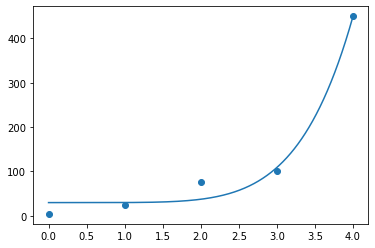

In [15]:
figma = [4,25,75,100,450]

figment = lambda x,a,b,c: a + b*x**c

imag = curve_fit(figment,list(range(len(figma))), figma)[0]

plt.plot(np.linspace(0,4,1000),[figment(i,*imag) for i in np.linspace(0,4,1000)])
plt.scatter(range(len(figma)),figma)

In [16]:
imag

array([29.53708267,  0.13552047,  5.79798582])